# Notebook pour nettoyer la donnée du datathon 2024

### Problématique : Je suis un propriétaire qui souhaite louer mon appartement, mais je ne sais pas quelle période me rapportera le plus d’argent ( évènements ou autre bonifie le prix de location).

Dataset : https://insideairbnb.com/get-the-data/

On prend les données de Lyon : 23 March, 2024 . 15 December, 2023  
Taille : environ 300 Mo

## Cleaning du dataset de Decembre 2023

#### calendar.csv
Pour le csv calendar nos features : listing_id, date, available, price, adjusted_price, minimum_nights, maximum_nights

Types de données des colonnes:
listing_id          int64
date               object
available          object
price              object
adjusted_price    float64
minimum_nights      int64
maximum_nights      int64
dtype: object


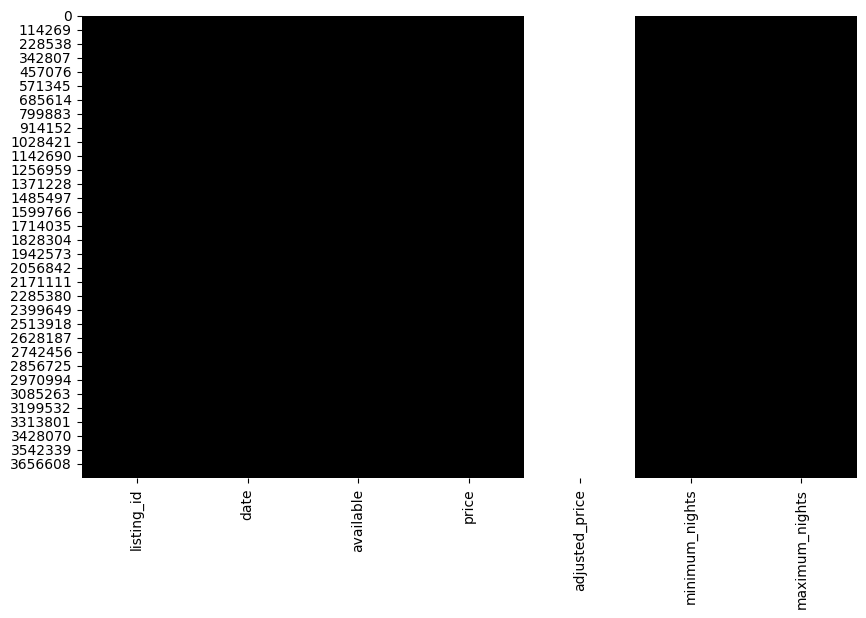

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

dataset_path = os.path.abspath('../Data')
dataset_raw_path = os.path.abspath('../Data/Raw')

# Creation de l'arborescence de fichiers pour le projet
# Définir les chemins pour les sous-dossiers Cleaned et Final

cleaned_data_path = os.path.join(dataset_path, 'Cleaned')

final_data_path = os.path.join(dataset_path, 'Final')

cleaned_december = os.path.join(cleaned_data_path, 'Data_15_Decembre_2023')
final_december =  os.path.join(final_data_path, 'Data_15_Decembre_2023')
cleaned_march = os.path.join(cleaned_data_path, 'Data_23_March_2024')
final_march = os.path.join(final_data_path, 'Data_23_March_2024')



# Créer les sous-dossiers s'ils n'existent pas
os.makedirs(cleaned_december, exist_ok=True)
os.makedirs(final_december, exist_ok=True)
os.makedirs(cleaned_march, exist_ok=True)
os.makedirs(final_march, exist_ok=True)


# Chargement du CSV
dataset_calendar = os.path.join(dataset_raw_path, 'Data_15_Decembre_2023', 'calendar.csv')

df = pd.read_csv(dataset_calendar)

# Créer une heatmap des valeurs manquantes
plt.figure(figsize=(10, 6))
sns.heatmap(
    df.isna(),
    cmap=['black', 'white'],
    cbar=False,
)

# Type des données
print("Types de données des colonnes:")
print(df.dtypes)

# Afficher la heatmap
plt.show()

On se rend compte qu'il y a un manque de donnée uniquement sur adjusted_price on drop donc la colonne et on sauvegarde le fichier cleaned

Pour le typing on observe en PowerBI que le price, est en $Number donc un string on va changer, le nom de la colonne en price_dollar et la data en number

In [73]:
# Renommer la colonne 'price' en 'price_dollar'
df.rename(columns={'price': 'price_dollar'}, inplace=True)

# Convertir les valeurs de 'price_dollar' en nombres
df['price_dollar'] = df['price_dollar'].replace('[\$,]', '', regex=True).astype(float)

# Supprimer la colonne 'adjusted_price'
df.drop(columns=['adjusted_price'], inplace=True)

# Afficher les types de données des colonnes après modification
print("Types de données des colonnes après modification:")
print(df.dtypes)

# Définir le chemin pour sauvegarder le nouveau fichier
cleaned_file_path = os.path.abspath(os.path.join(cleaned_december, 'calendar_clean.csv'))

# Sauvegarder le nouveau fichier CSV
df.to_csv(cleaned_file_path, index=False)
print(f"Le fichier nettoyé a été sauvegardé à l'emplacement: {cleaned_file_path}")


<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
C:\Users\pierr\AppData\Local\Temp\ipykernel_12716\4137448538.py:5: SyntaxWarning: invalid escape sequence '\$'
  df['price_dollar'] = df['price_dollar'].replace('[\$,]', '', regex=True).astype(float)


Types de données des colonnes après modification:
listing_id          int64
date               object
available          object
price_dollar      float64
minimum_nights      int64
maximum_nights      int64
dtype: object
Le fichier nettoyé a été sauvegardé à l'emplacement: c:\Users\pierr\OneDrive\Bureau\Work\CPE\5ETI\Big_Data\Datathon\datathon-2024\Data\Cleaned\Data_15_Decembre_2023\calendar_clean.csv


#### listing_detailed.csv

Nos features :  id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month

Enormement de features on va en drop pas mal

Valeurs manquantes dans calendar['price'] : 0
Valeurs manquantes dans listings['price'] après imputation : 0
Types de données des colonnes:
id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object


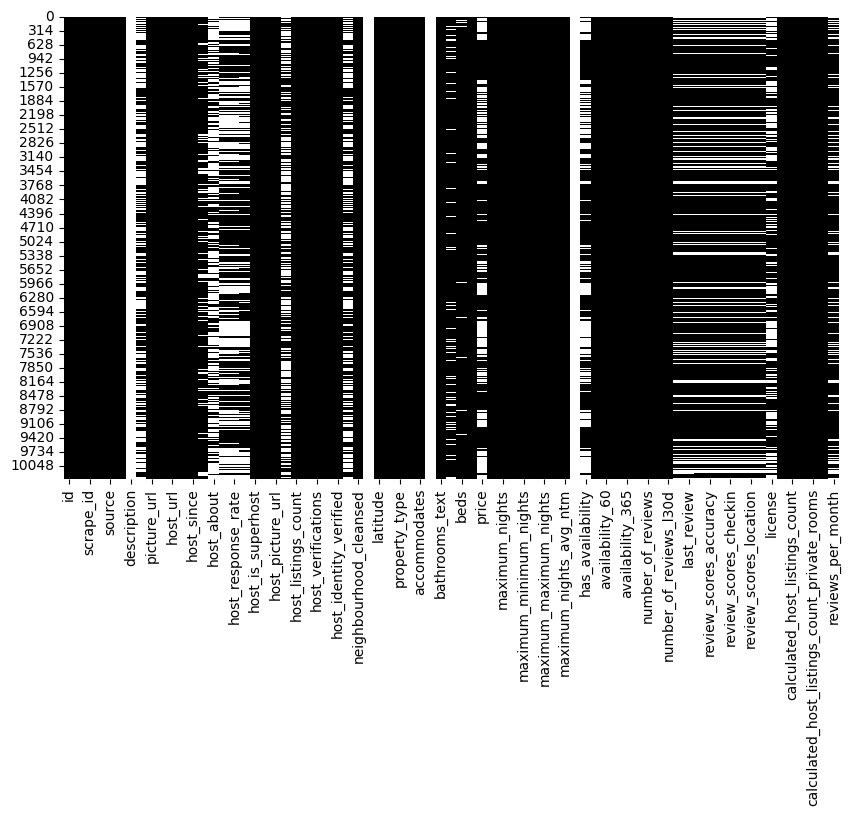

Pourcentage de valeurs manquantes par colonne:
id                                               0.000000
listing_url                                      0.000000
scrape_id                                        0.000000
last_scraped                                     0.000000
source                                           0.000000
                                                  ...    
calculated_host_listings_count                   0.000000
calculated_host_listings_count_entire_homes      0.000000
calculated_host_listings_count_private_rooms     0.000000
calculated_host_listings_count_shared_rooms      0.000000
reviews_per_month                               20.888588
Length: 75, dtype: float64
Types de données des colonnes après suppression des colonnes à plus de 50% vides:
id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                          

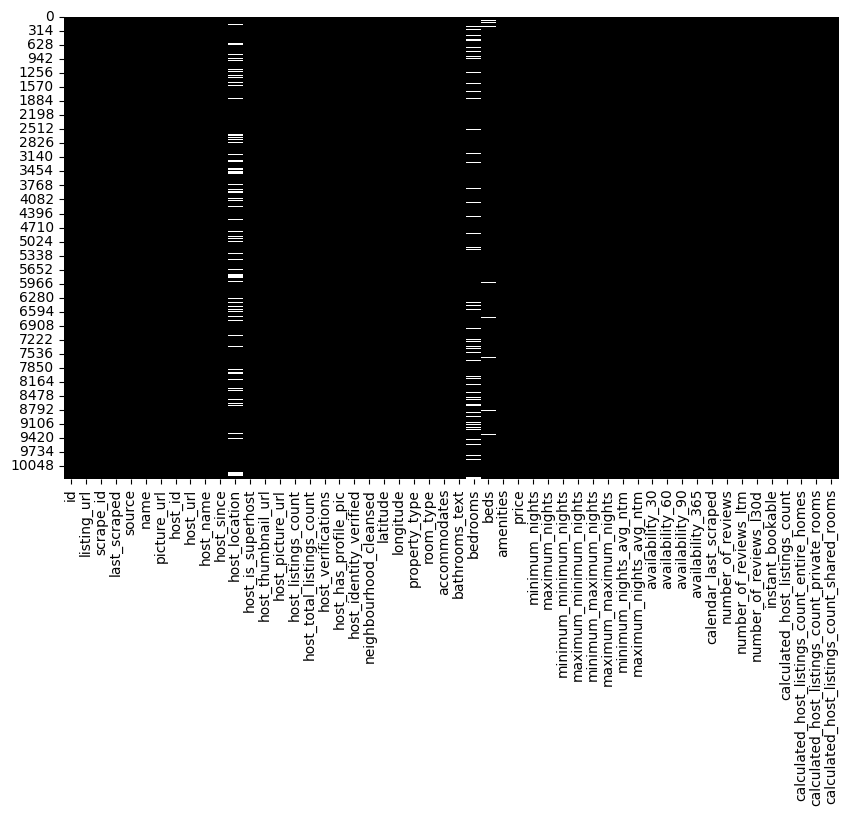

In [85]:
# Chargement du CSV
dataset_listings_detailed = os.path.join(dataset_raw_path, 'Data_15_Decembre_2023', 'listings_detailed.csv')

df = pd.read_csv(dataset_listings_detailed)

# Créer une heatmap des valeurs manquantes
plt.figure(figsize=(10, 6))
sns.heatmap(
    df.isna(),
    cmap=['black', 'white'],
    cbar=False,
)

# AJOUT DES PRIX 
import sys
# Ajouter le chemin du dossier parent du notebook au sys.path
sys.path.append(os.path.abspath('..'))

# Importer la fonction add_price depuis le module utils.add_price
from utils.add_price import add_price

# Exécuter la fonction add_price
listings_path = os.path.join(dataset_raw_path, 'Data_15_Decembre_2023', 'listings_detailed.csv')
calendar_path = os.path.join(dataset_raw_path, 'Data_15_Decembre_2023', 'calendar.csv')

df =  add_price(listings_path, calendar_path)


# Type des données
print("Types de données des colonnes:")
print(df.dtypes)

# Afficher la heatmap
plt.show()

# Nouvelle cellule de code pour supprimer les colonnes à plus de 50% vides
# Calculer le pourcentage de valeurs manquantes pour chaque colonne
missing_percentage = df.isna().mean() * 100

# Afficher les pourcentages de valeurs manquantes
print("Pourcentage de valeurs manquantes par colonne:")
print(missing_percentage)

# Supprimer les colonnes avec plus de 20% de valeurs manquantes
df_cleaned = df.loc[:, missing_percentage <= 20]

# Afficher les types de données des colonnes après suppression
print("Types de données des colonnes après suppression des colonnes à plus de 50% vides:")
print(df_cleaned.dtypes)

# Créer une heatmap des valeurs manquantes après suppression
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_cleaned.isna(),
    cmap=['black', 'white'],
    cbar=False,
)

# Afficher la heatmap après suppression
plt.show()



In [75]:
# Nous avons 
# Imprimer les features restantes
print("Features restantes après suppression des colonnes à plus de 50% vides:")
print(df_cleaned.columns.tolist())

Features restantes après suppression des colonnes à plus de 50% vides:
['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'instant_bookable', 'calculated_host_listings_count', 'calculated_ho

Types de données des colonnes après suppression des colonnes à plus de 50% vides et des colonnes spécifiées:
id                          int64
listing_url                object
scrape_id                   int64
last_scraped               object
source                     object
name                       object
picture_url                object
host_id                     int64
neighbourhood_cleansed     object
latitude                  float64
longitude                 float64
property_type              object
room_type                  object
accommodates                int64
bathrooms_text             object
bedrooms                  float64
beds                      float64
price                      object
availability_365            int64
dtype: object


C:\Users\pierr\AppData\Local\Temp\ipykernel_12716\3985661522.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=columns_to_drop, inplace=True, errors='ignore')


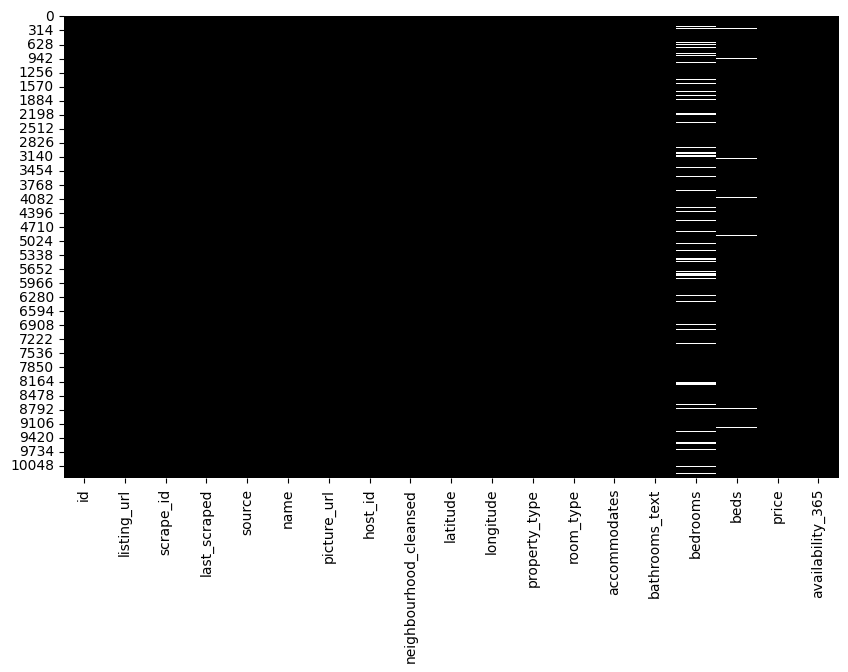

Features restantes après suppression des colonnes à plus de 50% vides et des colonnes spécifiées:
['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'picture_url', 'host_id', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'price', 'availability_365']


In [76]:
# Supprimer les colonnes spécifiées
columns_to_drop = [
    'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 
    'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 
    'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
    'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 
    'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 
    'availability_30', 'availability_60', 'availability_90', 'amenities', 'host_location', 'host_is_superhost',
    'host_url', 'host_name', 'host_since', 'host_thumbnail_url',
    'host_picture_url', 'host_listings_count', 'host_total_listings_count',
    'host_verifications', 'host_has_profile_pic', 'host_identity_verified'
]

df_cleaned.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Afficher les types de données des colonnes après suppression
print("Types de données des colonnes après suppression des colonnes à plus de 50% vides et des colonnes spécifiées:")
print(df_cleaned.dtypes)

# Créer une heatmap des valeurs manquantes après suppression
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_cleaned.isna(),
    cmap=['black', 'white'],
    cbar=False,
)

# Afficher la heatmap après suppression
plt.show()

# Imprimer les features restantes
print("Features restantes après suppression des colonnes à plus de 50% vides et des colonnes spécifiées:")
print(df_cleaned.columns.tolist())

In [77]:
# Imprimer les valeurs uniques de la colonne 'beds'
print("Valeurs uniques de la colonne 'beds':")
print(df_cleaned['beds'].unique())

Valeurs uniques de la colonne 'beds':
[ 3.  1.  2.  4.  5. nan  6.  7.  8. 16. 12.  9. 19. 11. 10.]


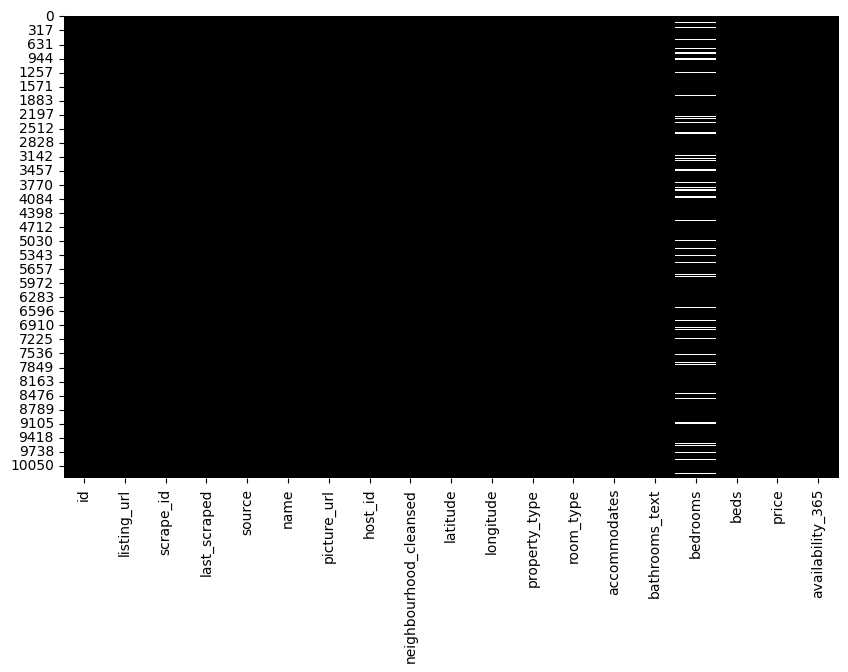

In [78]:
# Supprimer les lignes avec des valeurs manquantes
df_cleaned = df_cleaned.dropna(subset=['beds'])

# Créer une heatmap des valeurs manquantes après suppression
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_cleaned.isna(),
    cmap=['black', 'white'],
    cbar=False,
)

# Afficher la heatmap après suppression
plt.show()

On va supposer le nombre de bedrooms en fonction du nombre de beds

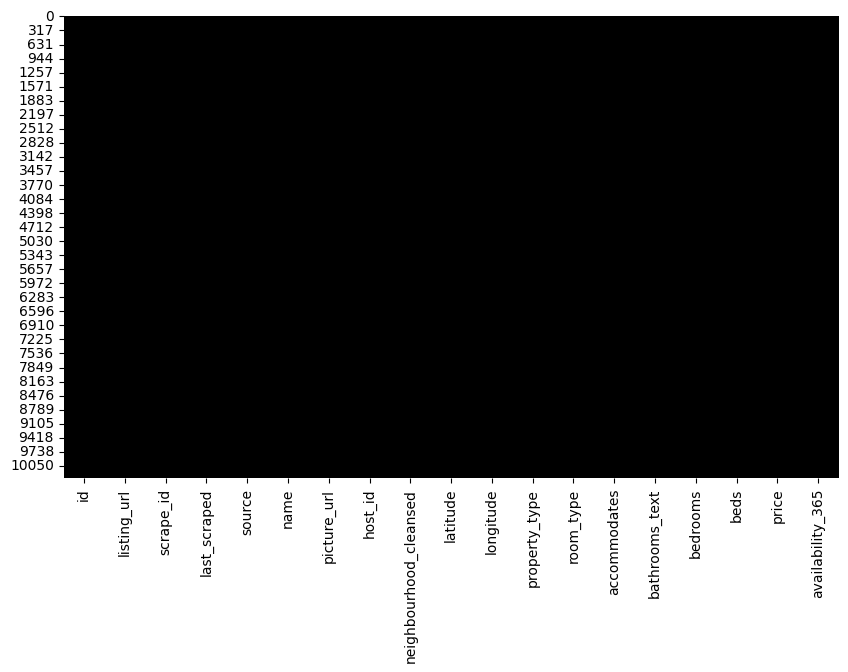

Le fichier nettoyé a été sauvegardé à l'emplacement: c:\Users\pierr\OneDrive\Bureau\Work\CPE\5ETI\Big_Data\Datathon\datathon-2024\Data\Cleaned\Data_15_Decembre_2023\listings_detailed_cleaned.csv


In [79]:


df_cleaned['bedrooms'] = df_cleaned.apply(
    lambda row: row['bedrooms'] if pd.notna(row['bedrooms']) else max(1, round(row['beds'] / 2)),
    axis=1
)

# Créer une heatmap des valeurs manquantes avant suppression
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_cleaned.isna(),
    cmap=['black', 'white'],
    cbar=False,
)
# Afficher la heatmap après suppression
plt.show()

# On sauvegarde dans le cleaned_data_path:

# Définir le chemin pour sauvegarder le nouveau fichier
cleaned_file_path = os.path.abspath(os.path.join(cleaned_december, 'listings_detailed_cleaned.csv'))

# Sauvegarder le nouveau fichier CSV
df_cleaned.to_csv(cleaned_file_path, index=False)
print(f"Le fichier nettoyé a été sauvegardé à l'emplacement: {cleaned_file_path}")


### listings_summary.csv
Nos features : 

id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license

Le fichier nettoyé a été sauvegardé à l'emplacement: c:\Users\pierr\OneDrive\Bureau\Work\CPE\5ETI\Big_Data\Datathon\datathon-2024\Data\Cleaned\Data_15_Decembre_2023\listings_summary_cleaned.csv


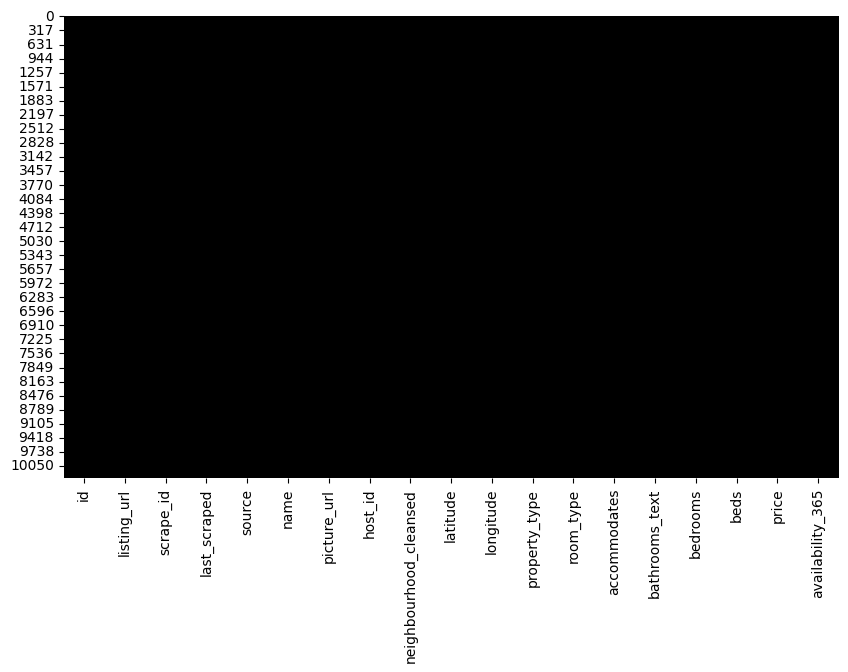

In [80]:
# Chargement du CSV
dataset_raw_path = os.path.abspath('../Data/Raw')
dataset_listings_detailed = os.path.join(dataset_raw_path, 'Data_15_Decembre_2023', 'listings_summary.csv')

df = pd.read_csv(dataset_listings_detailed)


# Supprimer les colonnes spécifiées
columns_to_drop = [
    'neighbourhood_group', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count'
    ,'license'
]

df_cleaned.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Créer une heatmap des valeurs manquantes avant suppression
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_cleaned.isna(),
    cmap=['black', 'white'],
    cbar=False,
)
# On sauvegarde dans le cleaned_data_path:

# Définir le chemin pour sauvegarder le nouveau fichier
cleaned_file_path = os.path.abspath(os.path.join(cleaned_december, 'listings_summary_cleaned.csv'))

# Sauvegarder le nouveau fichier CSV
df_cleaned.to_csv(cleaned_file_path, index=False)
print(f"Le fichier nettoyé a été sauvegardé à l'emplacement: {cleaned_file_path}")



## Cleaning du DataSet de Mars 

Même logique que précédemment.

#### calendar.csv

<>:25: SyntaxWarning: invalid escape sequence '\$'
<>:25: SyntaxWarning: invalid escape sequence '\$'
C:\Users\pierr\AppData\Local\Temp\ipykernel_12716\2287900631.py:25: SyntaxWarning: invalid escape sequence '\$'
  df['price_dollar'] = df['price_dollar'].replace('[\$,]', '', regex=True).astype(float)


Types de données des colonnes:
listing_id          int64
date               object
available          object
price              object
adjusted_price    float64
minimum_nights      int64
maximum_nights      int64
dtype: object


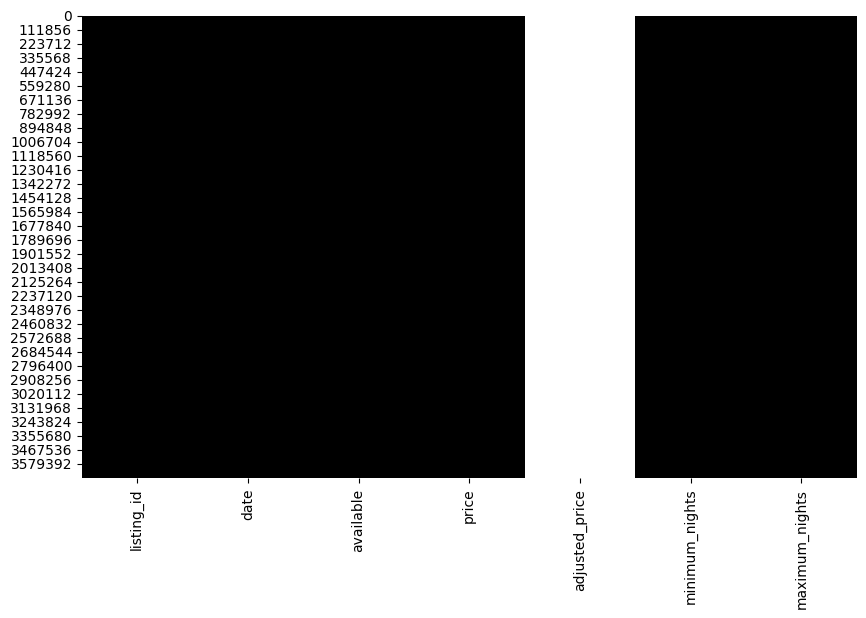

Types de données des colonnes après modification:
listing_id          int64
date               object
available          object
price_dollar      float64
minimum_nights      int64
maximum_nights      int64
dtype: object
Le fichier nettoyé a été sauvegardé à l'emplacement: c:\Users\pierr\OneDrive\Bureau\Work\CPE\5ETI\Big_Data\Datathon\datathon-2024\Data\Cleaned\Data_23_March_2024\calendar_cleaned.csv


In [81]:
# Chargement du CSV
dataset_calendar = os.path.join(dataset_raw_path, 'Data_23_March_2024', 'calendar.csv')

df = pd.read_csv(dataset_calendar)

# Créer une heatmap des valeurs manquantes
plt.figure(figsize=(10, 6))
sns.heatmap(
    df.isna(),
    cmap=['black', 'white'],
    cbar=False,
)

# Type des données
print("Types de données des colonnes:")
print(df.dtypes)

# Afficher la heatmap
plt.show()

# Renommer la colonne 'price' en 'price_dollar'
df.rename(columns={'price': 'price_dollar'}, inplace=True)

# Convertir les valeurs de 'price_dollar' en nombres
df['price_dollar'] = df['price_dollar'].replace('[\$,]', '', regex=True).astype(float)

# Supprimer la colonne 'adjusted_price'
df.drop(columns=['adjusted_price'], inplace=True)

# Afficher les types de données des colonnes après modification
print("Types de données des colonnes après modification:")
print(df.dtypes)

# Définir le chemin pour sauvegarder le nouveau fichier
cleaned_file_path = os.path.abspath(os.path.join(cleaned_march, 'calendar_cleaned.csv'))

# Sauvegarder le nouveau fichier CSV
df.to_csv(cleaned_file_path, index=False)
print(f"Le fichier nettoyé a été sauvegardé à l'emplacement: {cleaned_file_path}")

#### listing_detailed.csv

Nos features :  id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month

Enormement de features on va en drop pas mal

Valeurs manquantes dans calendar['price'] : 0
Valeurs manquantes dans listings['price'] après imputation : 0
Types de données des colonnes:
listing_id          int64
date               object
available          object
price_dollar      float64
minimum_nights      int64
maximum_nights      int64
dtype: object


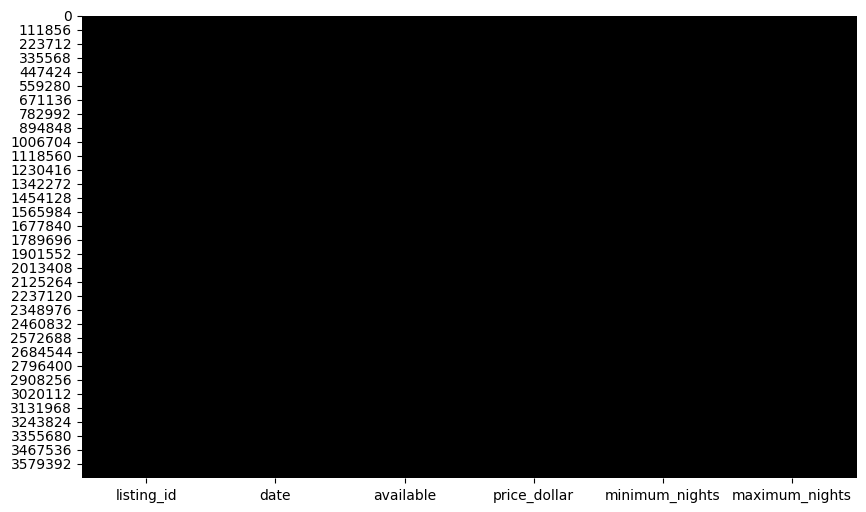

Pourcentage de valeurs manquantes par colonne:
listing_id        0.0
date              0.0
available         0.0
price_dollar      0.0
minimum_nights    0.0
maximum_nights    0.0
dtype: float64
Types de données des colonnes après suppression des colonnes à plus de 50% vides:
listing_id          int64
date               object
available          object
price_dollar      float64
minimum_nights      int64
maximum_nights      int64
dtype: object


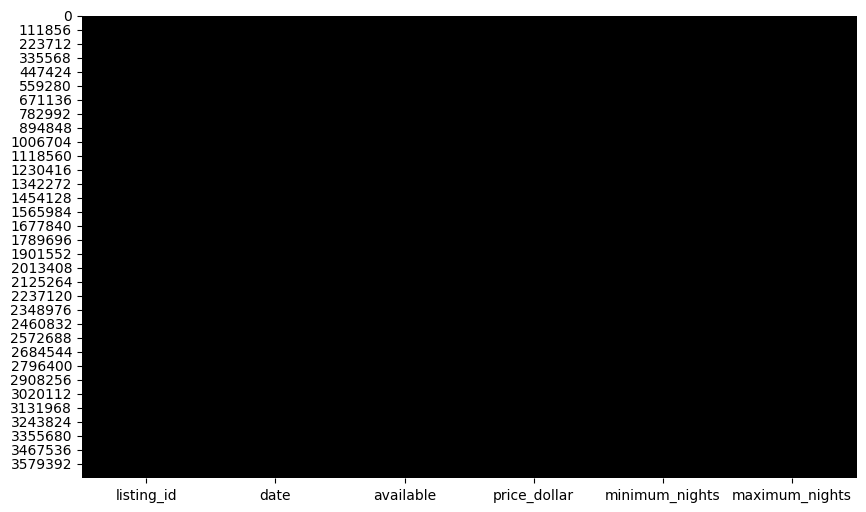

In [82]:
# Chargement du CSV
dataset_listings_detailed = os.path.join(dataset_raw_path, 'Data_23_March_2024', 'listings_detailed.csv')

df_listings_detailled = pd.read_csv(dataset_listings_detailed)


import sys
# Ajouter le chemin du dossier parent du notebook au sys.path
sys.path.append(os.path.abspath('..'))

# Importer la fonction add_price depuis le module utils.add_price
from utils.add_price import add_price

# Exécuter la fonction add_price
listings_path = os.path.join(dataset_raw_path, 'Data_23_March_2024', 'listings_detailed.csv')
calendar_path = os.path.join(dataset_raw_path, 'Data_23_March_2024', 'calendar.csv')

df_listings_detailled =  add_price(listings_path, calendar_path)


# Créer une heatmap des valeurs manquantes
plt.figure(figsize=(10, 6))
sns.heatmap(
    df.isna(),
    cmap=['black', 'white'],
    cbar=False,
)

# Type des données
print("Types de données des colonnes:")
print(df.dtypes)

# Afficher la heatmap
plt.show()

# Nouvelle cellule de code pour supprimer les colonnes à plus de 50% vides
# Calculer le pourcentage de valeurs manquantes pour chaque colonne
missing_percentage = df.isna().mean() * 100

# Afficher les pourcentages de valeurs manquantes
print("Pourcentage de valeurs manquantes par colonne:")
print(missing_percentage)

# Supprimer les colonnes avec plus de 20% de valeurs manquantes
df_cleaned = df.loc[:, missing_percentage <= 20]

# Afficher les types de données des colonnes après suppression
print("Types de données des colonnes après suppression des colonnes à plus de 50% vides:")
print(df_cleaned.dtypes)

# Créer une heatmap des valeurs manquantes après suppression
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_cleaned.isna(),
    cmap=['black', 'white'],
    cbar=False,
)

# Afficher la heatmap après suppression
plt.show()

Types de données des colonnes après suppression des colonnes à plus de 50% vides et des colonnes spécifiées:
listing_id        int64
date             object
available        object
price_dollar    float64
dtype: object


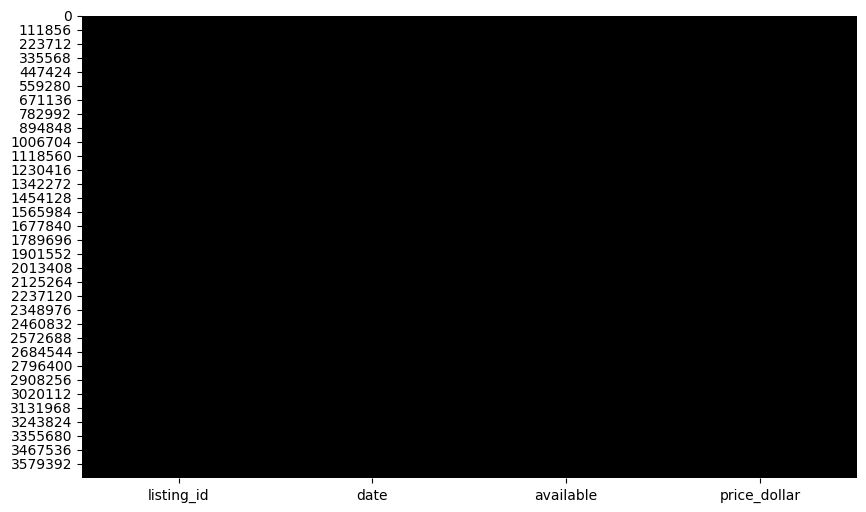

Features restantes après suppression des colonnes à plus de 50% vides et des colonnes spécifiées:
['listing_id', 'date', 'available', 'price_dollar']


In [83]:
columns_to_drop = [
    'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 
    'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 
    'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
    'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 
    'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 
    'availability_30', 'availability_60', 'availability_90', 'amenities', 'host_location', 'host_is_superhost',
    'host_url', 'host_name', 'host_since', 'host_thumbnail_url',
    'host_picture_url', 'host_listings_count', 'host_total_listings_count',
    'host_verifications', 'host_has_profile_pic', 'host_identity_verified'
]

df_cleaned.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Afficher les types de données des colonnes après suppression
print("Types de données des colonnes après suppression des colonnes à plus de 50% vides et des colonnes spécifiées:")
print(df_cleaned.dtypes)

# Créer une heatmap des valeurs manquantes après suppression
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_cleaned.isna(),
    cmap=['black', 'white'],
    cbar=False,
)

# Afficher la heatmap après suppression
plt.show()

# Imprimer les features restantes
print("Features restantes après suppression des colonnes à plus de 50% vides et des colonnes spécifiées:")
print(df_cleaned.columns.tolist())

In [84]:
# Imprimer les valeurs uniques de la colonne 'beds'
print("Valeurs uniques de la colonne 'beds':")
print(df_cleaned['beds'].unique())

Valeurs uniques de la colonne 'beds':


KeyError: 'beds'

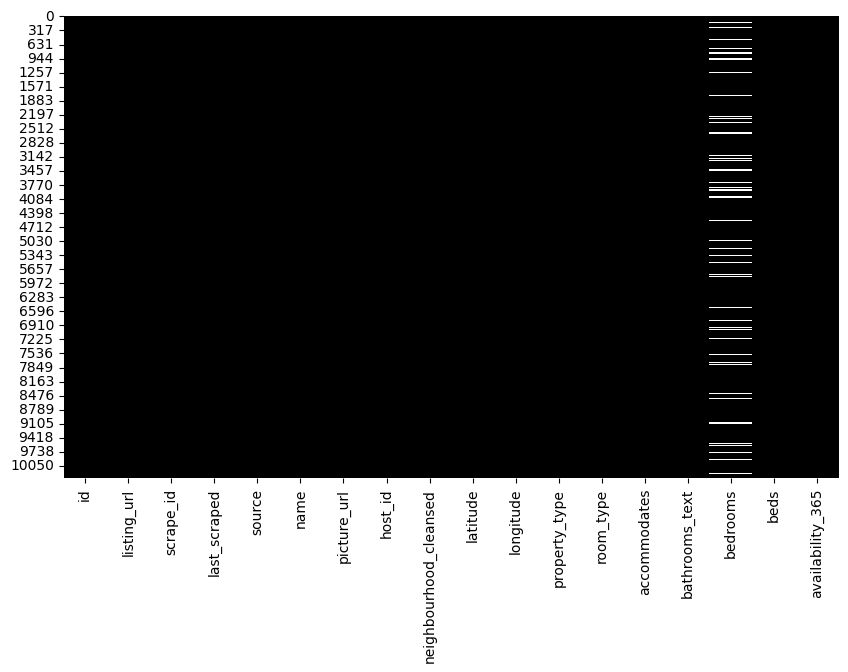

In [ ]:
# Supprimer les lignes avec des valeurs manquantes
df_cleaned = df_cleaned.dropna(subset=['beds'])

# Créer une heatmap des valeurs manquantes après suppression
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_cleaned.isna(),
    cmap=['black', 'white'],
    cbar=False,
)

# Afficher la heatmap après suppression
plt.show()

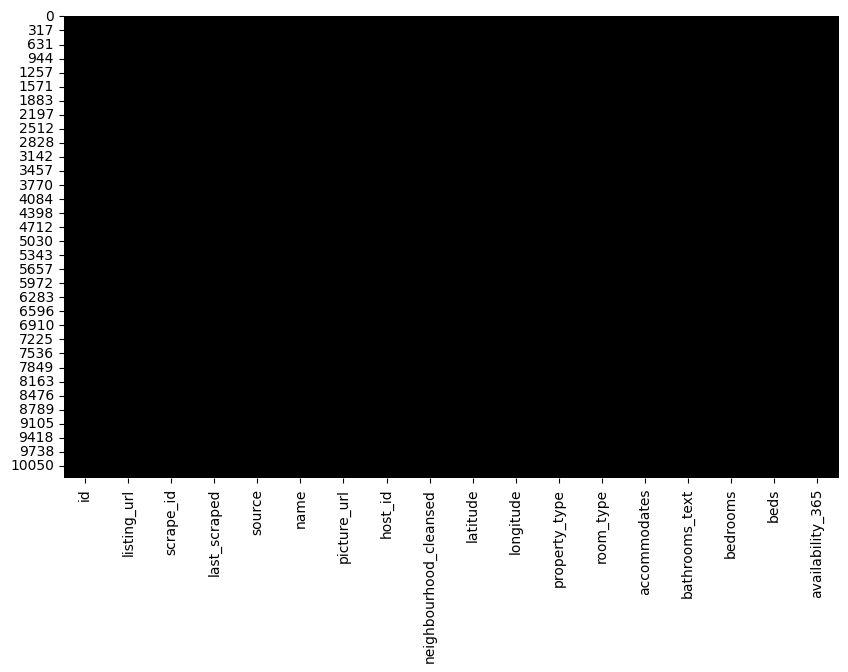

In [ ]:

df_cleaned['bedrooms'] = df_cleaned.apply(
    lambda row: row['bedrooms'] if pd.notna(row['bedrooms']) else max(1, round(row['beds'] / 2)),
    axis=1
)

# Créer une heatmap des valeurs manquantes avant suppression
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_cleaned.isna(),
    cmap=['black', 'white'],
    cbar=False,
)
# Afficher la heatmap après suppression
plt.show()

# On sauvegarde dans le cleaned_data_path:

# Définir le chemin pour sauvegarder le nouveau fichier
cleaned_file_path = os.path.abspath(os.path.join(cleaned_december, 'listings_detailed_cleaned.csv'))

# Sauvegarder le nouveau fichier CSV
df_cleaned.to_csv(cleaned_file_path, index=False)
print(f"Le fichier nettoyé a été sauvegardé à l'emplacement: {cleaned_file_path}")




### listings_summary.csv
Nos features : 

id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license

Le fichier nettoyé a été sauvegardé à l'emplacement: c:\Users\pierr\OneDrive\Bureau\Work\CPE\5ETI\Big_Data\Datathon\datathon-2024\Data\Cleaned\Data_23_March_2024\listings_summary_cleaned.csv


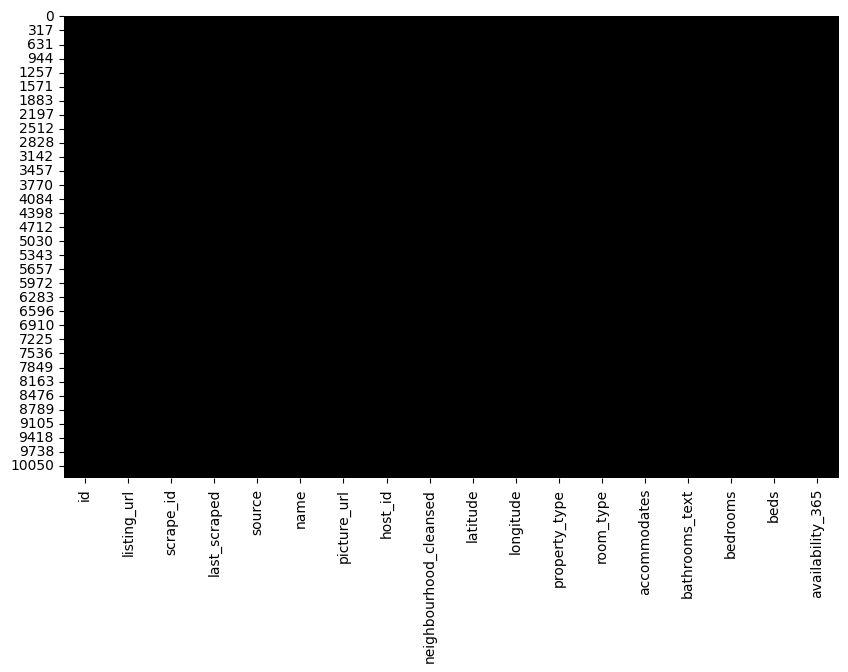

In [ ]:
# Chargement du CSV
dataset_raw_path = os.path.abspath('../Data/Raw')
dataset_listings_detailed = os.path.join(dataset_raw_path, 'Data_15_Decembre_2023', 'listings_summary.csv')

df = pd.read_csv(dataset_listings_detailed)


# Supprimer les colonnes spécifiées
columns_to_drop = [
    'neighbourhood_group', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count'
    ,'license'
]

df_cleaned.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Créer une heatmap des valeurs manquantes avant suppression
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_cleaned.isna(),
    cmap=['black', 'white'],
    cbar=False,
)
# On sauvegarde dans le cleaned_data_path:

# Définir le chemin pour sauvegarder le nouveau fichier
cleaned_file_path = os.path.abspath(os.path.join(cleaned_march, 'listings_summary_cleaned.csv'))

# Sauvegarder le nouveau fichier CSV
df_cleaned.to_csv(cleaned_file_path, index=False)
print(f"Le fichier nettoyé a été sauvegardé à l'emplacement: {cleaned_file_path}")